# Summary
1. No Transaction on Saturday
2. November 2011 is the Highest Sales
3. December 2011 look suspicious, Usualy the highest sales accure in December (Dataset only until 2011-12-09)
4. Day 1 to 8 is the busiest day, after that sale start to decline 
5. Sales tend to increase from Monday to Thuesday, and decrease 
6. Majority of sale accure at 10:00 to 15:00, peak at 12:00

Most transaction accure during work hours (Heheh)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
color = sns.color_palette()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv



In [2]:
df = pd.read_csv('../input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# Credit:https://www.kaggle.com/fabiendaniel/customer-segmentation

order_canceled = df['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


There is 10626 transaction that have negative quantity or unitPrice

In [4]:
# Item sale with Quantity <=0 or unitPrice < 0
print (((df['Quantity'] <= 0) | (df['UnitPrice'] < 0)).value_counts())

#Delete the negative values 
df = df.loc[(df['Quantity'] > 0) | (df['UnitPrice'] >= 0)]

False    531283
True      10626
dtype: int64


In [5]:
%%timeit
df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

20.3 s ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Number of Invoice
### Number Invoice group by Month

<AxesSubplot:title={'center':'Frequency of order by Month'}>

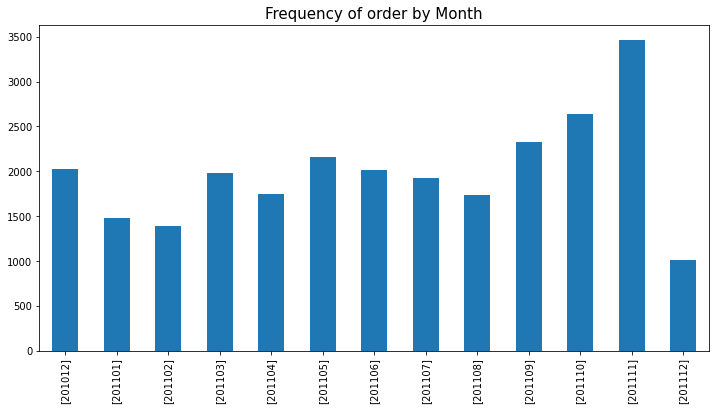

In [6]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

In [7]:
# 2010-12 Dataset end at
df.loc[df['yearmonth'] == 201012]['InvoiceDate'].max()

Timestamp('2010-12-23 17:41:00')

In [8]:
# 2011-12 Dataset end at
df.loc[df['yearmonth'] == 201112]['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

### Number Invoice group by Week

<AxesSubplot:title={'center':'Frequency of order by Week'}>

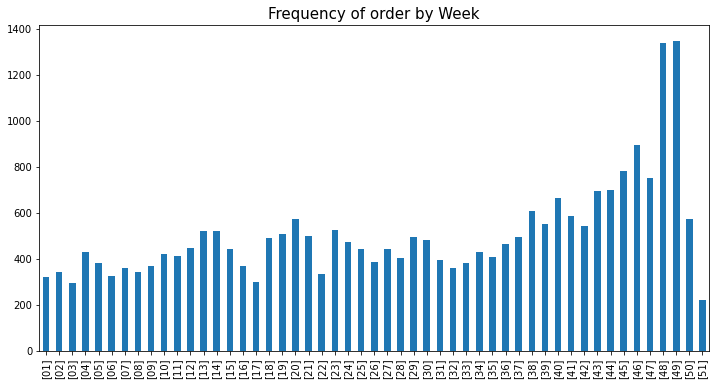

In [9]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

### Number Invoice group by day

<AxesSubplot:title={'center':'Frequency of order by Day'}>

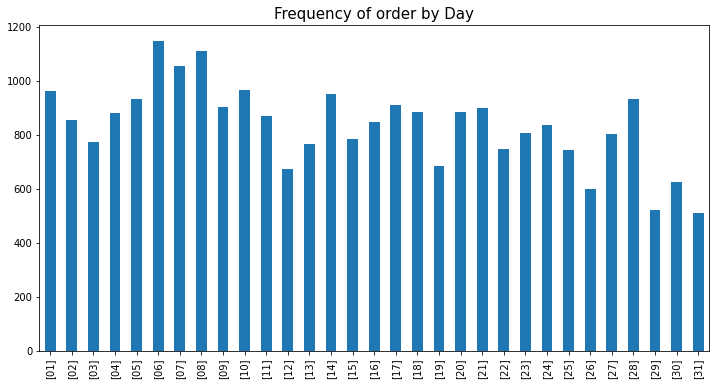

In [10]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

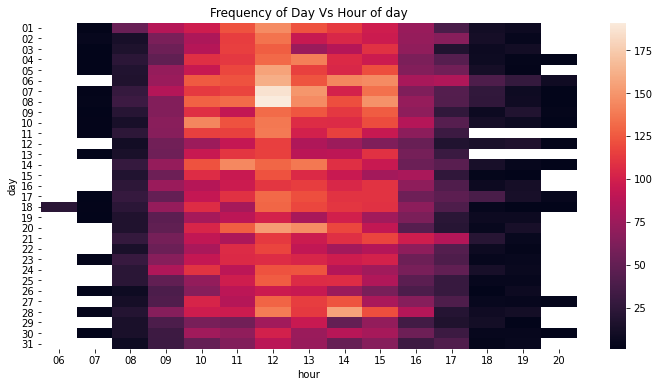

In [11]:
grouped_df  = df.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('day', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

### Number Invoice group by Weekday
[0] ~ Sunday

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

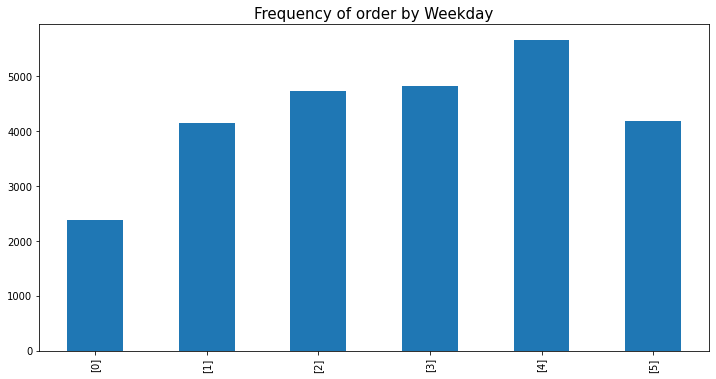

In [12]:
#[0] ~ Sunday
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

### Number Invoice group by Hour

<AxesSubplot:title={'center':'Frequency of order by hour of day'}>

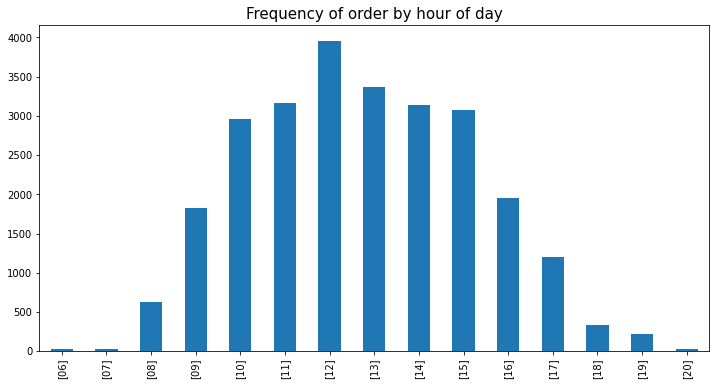

In [13]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()

### Frequency of Day of week Vs Hour of day

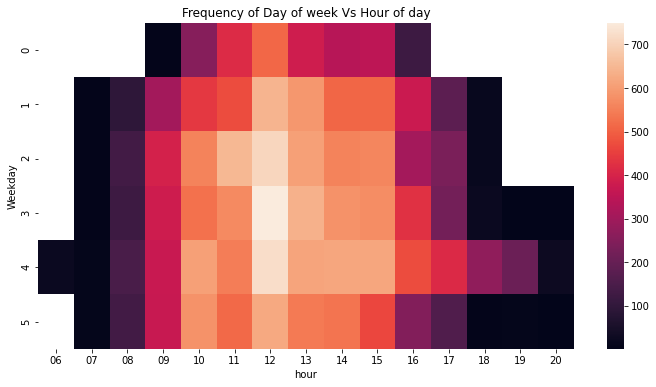

In [14]:
grouped_df  = df.groupby(["Weekday", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('Weekday', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

## Total Sales (First order vs Reorder)

In [16]:
df = pd.read_csv('../input/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

#remove the negative values and replace with nan
df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = np.nan

df.dropna(inplace=True)

df['total_dollars'] = df['Quantity']*df['UnitPrice']

df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

In [17]:
#First Item Order
df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_dollars,yearmonth,Week,day,Weekday,hour,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,201101,03,18,2,10,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.0,2011-04-07 10:43:00,0.25,12347,Iceland,6.0,201104,14,07,4,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36.0,2011-06-09 13:01:00,0.30,12347,Iceland,10.8,201106,23,09,4,13,0
148289,549222,20665,RED RETROSPOT PURSE,6.0,2011-04-07 10:43:00,2.95,12347,Iceland,17.7,201104,14,07,4,10,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10.0,2011-01-26 14:30:00,0.85,12347,Iceland,8.5,201101,04,26,3,14,0


### Top 10 Reorder Item

In [18]:
#Top 10 Reorder item
pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1172
JUMBO BAG RED RETROSPOT,983
REGENCY CAKESTAND 3 TIER,843
LUNCH BAG RED RETROSPOT,785
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,730
PARTY BUNTING,689
LUNCH BAG BLACK SKULL.,647
LUNCH BAG SUKI DESIGN,621


### Sales by Month

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

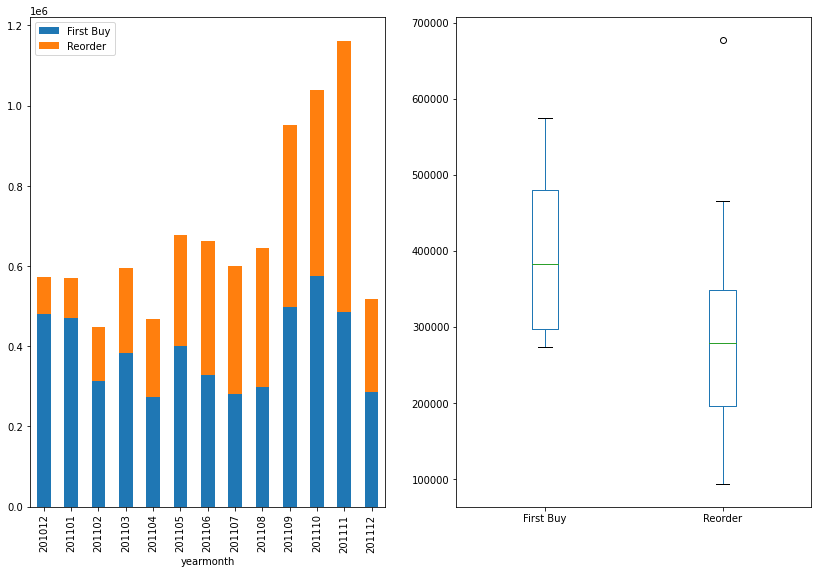

In [19]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['yearmonth'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['yearmonth'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

### Sales by Week

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

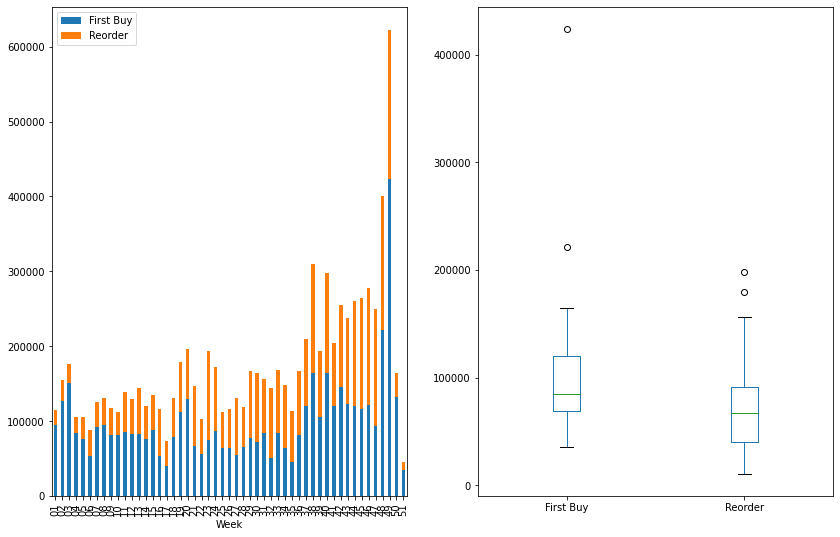

In [20]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['Week'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['Week'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

### Sales by Day

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

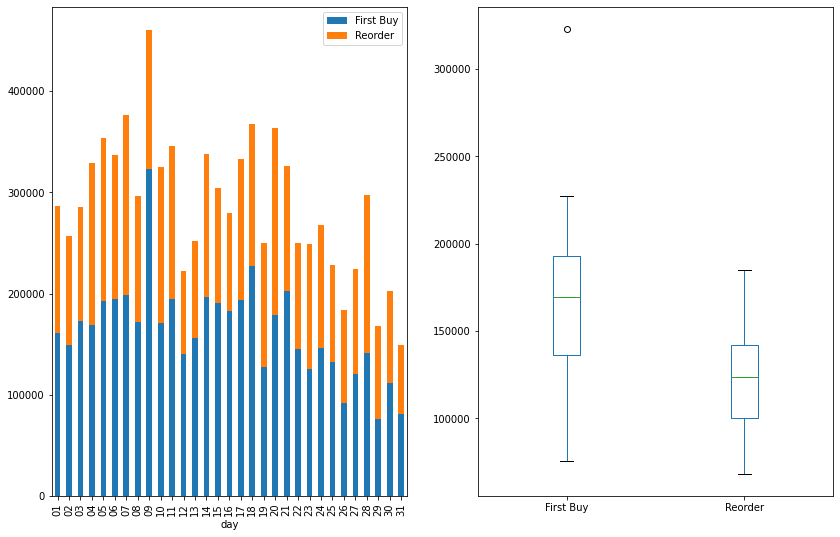

In [21]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['day'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['day'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])